IMPORTS

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Data
dataSize = 100
theta0Data = 2
theta1Data = 3

#Trainings
iterations = 100
lernrate = 0.0001
theta_0 = 0
theta_1 = 0

------------------ Aufgabe - 1 ------------------

<function matplotlib.pyplot.show(*args, **kw)>

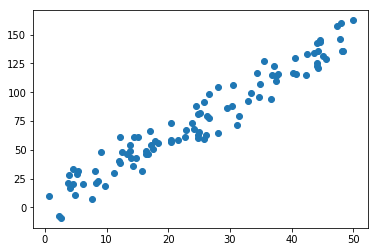

In [3]:
x = np.random.uniform(0, 50, dataSize) 

# y = b + a*x
b = (theta0Data + np.random.normal(0, 10, dataSize) * 1)
ax = (theta1Data * (x + np.random.uniform(-1, 1, dataSize)))

y = b + ax

plt.scatter(x,y)
plt.show

------------------ Aufgabe - 2 ------------------

In [4]:
def linear_hypothesis(theta_0, theta_1):
    def h(x):
        y = theta_0 + theta_1*x
        return y
    return h

------------------ Aufgabe - 3 ------------------

In [5]:
def cost_function(hypothesis, x, y):
    def j(theta_0, theta_1):
        hypothesis = linear_hypothesis(theta_0, theta_1)
        cost = 1/(2*len(x))*((hypothesis(x) - y)**2).sum()
        return cost
    return j

------------------ Aufgabe - 4 ------------------

Text(0.5,1,'Kostenfunktion')

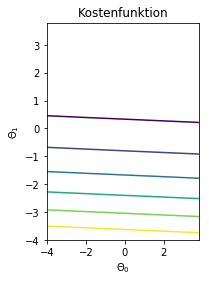

In [6]:
ran = 4.
a=theta_0
b=theta_1

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)


C = np.zeros([len(t0),len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)
T0, T1 = np.meshgrid(t0, t1)

plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')

------------------ Aufgabe - 5 ------------------

In [7]:
def compute_new_theta (x,y,theta_0,theta_1,alpha):

    temp0 = 1/len(x) * (theta_0 + theta_1 * x - y).sum()
    temp1 = 1/len(x) * ((theta_0 + theta_1 * x - y) * x).sum() # # abgeleitet

    theta_0 -= alpha*  temp0
    theta_1 -= alpha*  temp1

    return theta_0, theta_1

------------------ Aufgabe - 6 ------------------

In [8]:
def gradient_descent(theta_0, theta_1):
    for i in range (iterations):
        theta_0, theta_1 = compute_new_theta (x, y, theta_0, theta_1, lernrate)
        hypothesis = linear_hypothesis(theta_0,theta_1)
    
    plt.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")
    plt.scatter(x, y, color='b', s=20)
    plt.show()

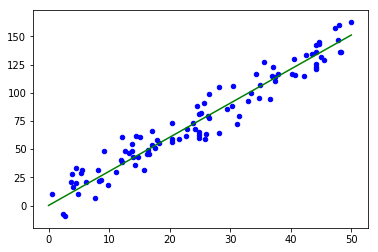

In [9]:
gradient_descent(theta_0, theta_1)

In [10]:
def gradient_descent_new(theta_0, theta_1):
    j = cost_function(linear_hypothesis(theta_0,theta_1), x, y)
    counter = 1
    j_old = j(theta_0, theta_1)
    while True:
        counter += 1
        theta_0, theta_1 = compute_new_theta (x, y, theta_0, theta_1, lernrate)
        hypothesis = linear_hypothesis(theta_0,theta_1)
        j_new = j(theta_0, theta_1)
        plt.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")
        if (j_old - j_new < 1.0 or counter > 200):
            break
        j_old = j_new    
    plt.scatter(x, y, color='b', s=20)
    plt.show()

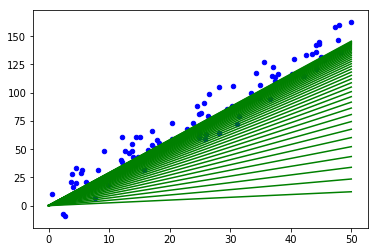

In [11]:
gradient_descent_new(theta_0, theta_1)

In [17]:
def gradient_descent_lernrate(theta_0, theta_1, lernrate, color):
    costs = np.array([])
    for i in range (iterations):
        theta_0_old = theta_0
        theta_1_old = theta_1
        theta_0, theta_1 = compute_new_theta (x, y, theta_0, theta_1, lernrate)
        hypothesis = linear_hypothesis(theta_0,theta_1)
        j = cost_function(hypothesis, x, y)
        j_value = j(theta_0, theta_1)
        costs = np.append(costs, j_value, None)
    
    return [costs, hypothesis, x, y]
    # first plot
    # second plot
    # plt.scatter(x, y, color='b', s=20)
    # plt.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")
    # plt.show()

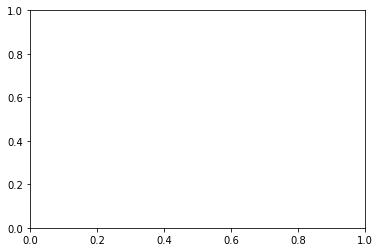

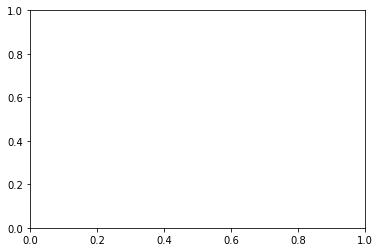

In [26]:
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax2 = f2.add_subplot(111)

gradient_1 = gradient_descent_lernrate(theta_0, theta_1, 0.0001, "r")
#ax1.plot(costs)
#ax2.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")

gradient_2 = gradient_descent_lernrate(theta_0, theta_1, 0.0003, "g")
#ax1.plot(costs)
#ax2.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")

gradient_3 = gradient_descent_lernrate(theta_0, theta_1, 0.0005, "b")
#ax1.plot(costs)
#ax2.plot([0,50],[hypothesis(0),hypothesis(50)], color="g")